<a href="https://colab.research.google.com/github/jeffvestal/bird_image_identifier/blob/main/bird_identifier_v2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What Kind of Bird is it?

# Setup

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
# Install latest fastai libs
!pip install -Uqq fastai

In [2]:
# Import fast.ai vision libs
from fastai.vision.all import *

## Download the Bird dataset

In [3]:
# https://docs.fast.ai/data.external.html#image-classification-datasets
path = untar_data(URLs.CUB_200_2011)

Dataset structure is like:

```
CUB_200_2011/
CUB_200_2011/images/
CUB_200_2011/images/001.Black_footed_Albatross/
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
CUB_200_2011/images/001.Black_footed_Albatross/
Black_Footed_Albatross_0032_796115.jpg
```

the default `parent_label` func doesn't strip off the leading 001 from the bird type
 this func does that

`strip_parent_num(p)`

In [4]:
def strip_parent_num(o):
  return parent_label(o).split('.')[1]

## Download birds to test with

In [5]:
!pip install -Uqq duckduckgo_search


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): 
  return L(ddg_images(term, max_results=max_images)).itemgot('image')


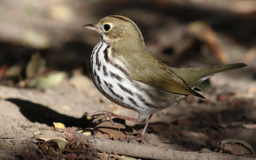

In [7]:
# Download Oven Bird photo
urls = search_images('oven bird photos', max_images=1)
urls[0]
     
from fastdownload import download_url
dest = 'oven-bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

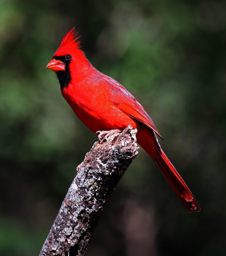

In [8]:
# Download Cardinal photo
urls = search_images('cardinal photos', max_images=1)
urls[0]
     
from fastdownload import download_url
dest = 'cardinal.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

# Training

## DataBlock - RandomResizedCrop - 192

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=strip_parent_num,
    item_tfms=RandomResizedCrop(192, min_scale=0.3)
).dataloaders(path, bs=32)

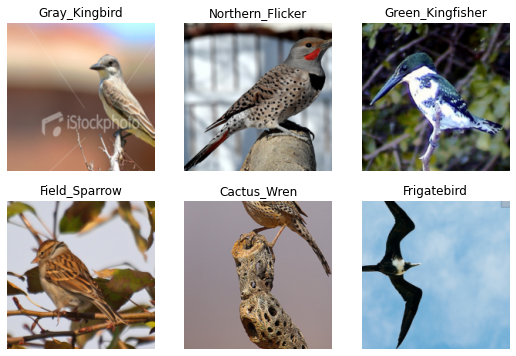

In [10]:
dls.show_batch(max_n=6)

### resnet18

#### 3 epochs

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.764773,2.371276,0.593975,01:09


epoch,train_loss,valid_loss,error_rate,time
0,2.383356,1.649168,0.434026,01:11


epoch,train_loss,valid_loss,error_rate,time
0,2.383356,1.649168,0.434026,01:11
1,1.790967,1.294353,0.347051,01:14
2,1.278953,1.199442,0.312686,01:12


In [ ]:
# Generate Confusion Matrix

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

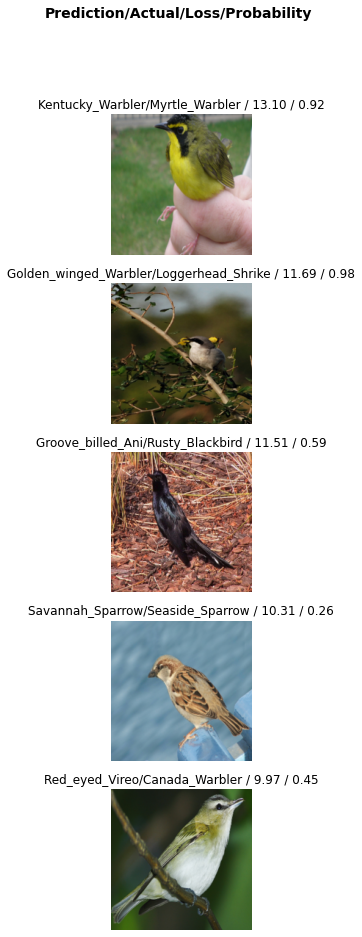

In [21]:
# Show Top losses

interp.plot_top_losses(5, nrows=5)

In [22]:
# Test againt samples
is_bird1,_,probs1 = learn.predict(PILImage.create('oven-bird.jpg'))
print(f"This is a: {is_bird1}.")
print(f"Probability it's a that: {probs1[0]:.10f}")
print()
is_bird2,_,probs2 = learn.predict(PILImage.create('cardinal.jpg'))
print(f"This is a: {is_bird2}.")
print(f"Probability it's a that: {probs2[0]:.10f}")

This is a: Ovenbird.
Probability it's a that: 0.0008157436



This is a: Cardinal.
Probability it's a that: 0.0000007838


### resnet34

#### 3 epochs

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.622225,2.245879,0.560034,01:23


epoch,train_loss,valid_loss,error_rate,time
0,2.249786,1.598693,0.432754,01:15
1,1.633142,1.180521,0.328808,01:14
2,1.154731,1.074966,0.303776,01:14


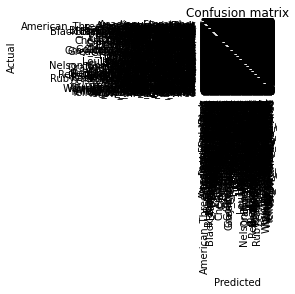

In [ ]:
# Generate Confusion Matrix

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

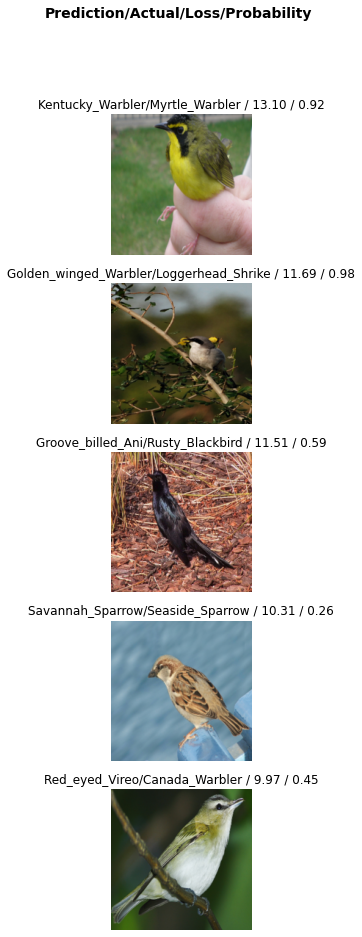

In [ ]:
# Show Top losses

interp.plot_top_losses(5, nrows=5)

In [ ]:
# Test againt samples
is_bird1,_,probs1 = learn.predict(PILImage.create('oven-bird.jpg'))
print(f"This is a: {is_bird1}.")
print(f"Probability it's a that: {probs1[0]:.10f}")
print()
is_bird2,_,probs2 = learn.predict(PILImage.create('cardinal.jpg'))
print(f"This is a: {is_bird2}.")
print(f"Probability it's a that: {probs2[0]:.10f}")

This is a: Ovenbird.
Probability it's a that: 0.0003741132



This is a: Cardinal.
Probability it's a that: 0.0000000345


**Notes**

Test results seemed good, little better than resnet18, as expected with basically the same training time / epoch

Error rate on training is really high @ 30%

-- need to try cleaning some of the data to delete the highest error bird training samples